### Step 1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load the Dataset

In [4]:
data_path = 'smartphones.csv'
smartphones = pd.read_csv(data_path)

smartphones.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


### Step 3: Dataset Exploration

In [5]:
smartphones.shape

(1816, 8)

In [6]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [7]:
smartphones.dtypes

Smartphone      object
Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price    float64
dtype: object

In [8]:
smartphones.describe()

,RAM,Storage,Final Price
count,1333.00000,1791.000000,1816.000000
mean,5.96099,162.652150,492.175573
std,2.66807,139.411605,398.606183
min,1.00000,2.000000,60.460000
25%,4.00000,64.000000,200.990000
50%,6.00000,128.000000,349.990000
75%,8.00000,256.000000,652.717500
max,12.00000,1000.000000,2271.280000


### Step 4: Data Cleaning and Validation

In [9]:
smartphones[smartphones.isna().any(axis=1)].head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
16,Apple iPhone 14 128GB Medianoche Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1009.0
25,Apple iPhone 14 Pro Max 256GB Negro Espacial L...,Apple,iPhone 14,NaN,256.0,Black,Yes,1599.0
31,Apple iPhone 14 Pro Max 128GB Negro Espacial L...,Apple,iPhone 14,NaN,128.0,Black,Yes,1469.0
39,Apple iPhone 14 Pro Max 128GB Oro Libre,Apple,iPhone 14,NaN,128.0,Gold,Yes,1469.0
88,Apple iPhone 14 Pro 128GB Negro Espacial Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1319.0


In [11]:
brand_medians = smartphones.groupby('Brand').agg({'RAM' : 'median', 'Storage' : 'median'})

brand_medians.head()

,RAM,Storage
Brand,,
Alcatel,2.0,32.0
Apple,NaN,256.0
Asus,8.0,256.0
BQ,NaN,2.0
Blackview,4.0,64.0


In [12]:
for brand in brand_medians.index:
    smartphones.loc[smartphones['Brand'] == brand, 'RAM'] = smartphones.loc[smartphones['Brand'] == brand, 'RAM'].fillna(brand_medians.loc[brand, 'RAM'])
    smartphones.loc[smartphones['Brand'] == brand, 'Storage'] = smartphones.loc[smartphones['Brand'] == brand, 'Storage'].fillna(brand_medians.loc[brand, 'Storage'])

In [13]:
smartphones[['RAM', 'Storage']].isnull().sum()

RAM        296
Storage      0
dtype: int64

In [14]:
ram_median = smartphones['RAM'].median()
smartphones['RAM'].fillna(ram_median, inplace=True)

In [15]:
smartphones[['RAM']].isnull().sum()

RAM    0
dtype: int64

In [16]:
duplicate_rows = smartphones.duplicated().sum()
duplicate_rows

0

In [17]:
brand_medians = smartphones.groupby('Brand').agg({'RAM' : 'median', 'Storage' : 'median'})

brand_medians.head(10)

,RAM,Storage
Brand,,
Alcatel,2.0,32.0
Apple,6.0,256.0
Asus,8.0,256.0
BQ,6.0,2.0
Blackview,4.0,64.0
CAT,6.0,80.0
Crosscall,3.5,48.0
Cubot,4.0,64.0
Doro,2.0,32.0


### Step 5: Data Transformation and Feature Engineering

In [18]:
smartphones.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [19]:
price_bins = [0, 200, 500, 1000, np.inf]
price_labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury']

smartphones['Price Category'] = pd.cut(smartphones['Final Price'], bins=price_bins, labels=price_labels)

In [20]:
smartphones.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price,Price Category
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60,Mid-Range
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00,Mid-Range
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01,Budget
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99,Mid-Range
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00,Premium


### Step 6: Data Visualization

Text(0.5, 1.0, 'Storage vs Final Price')

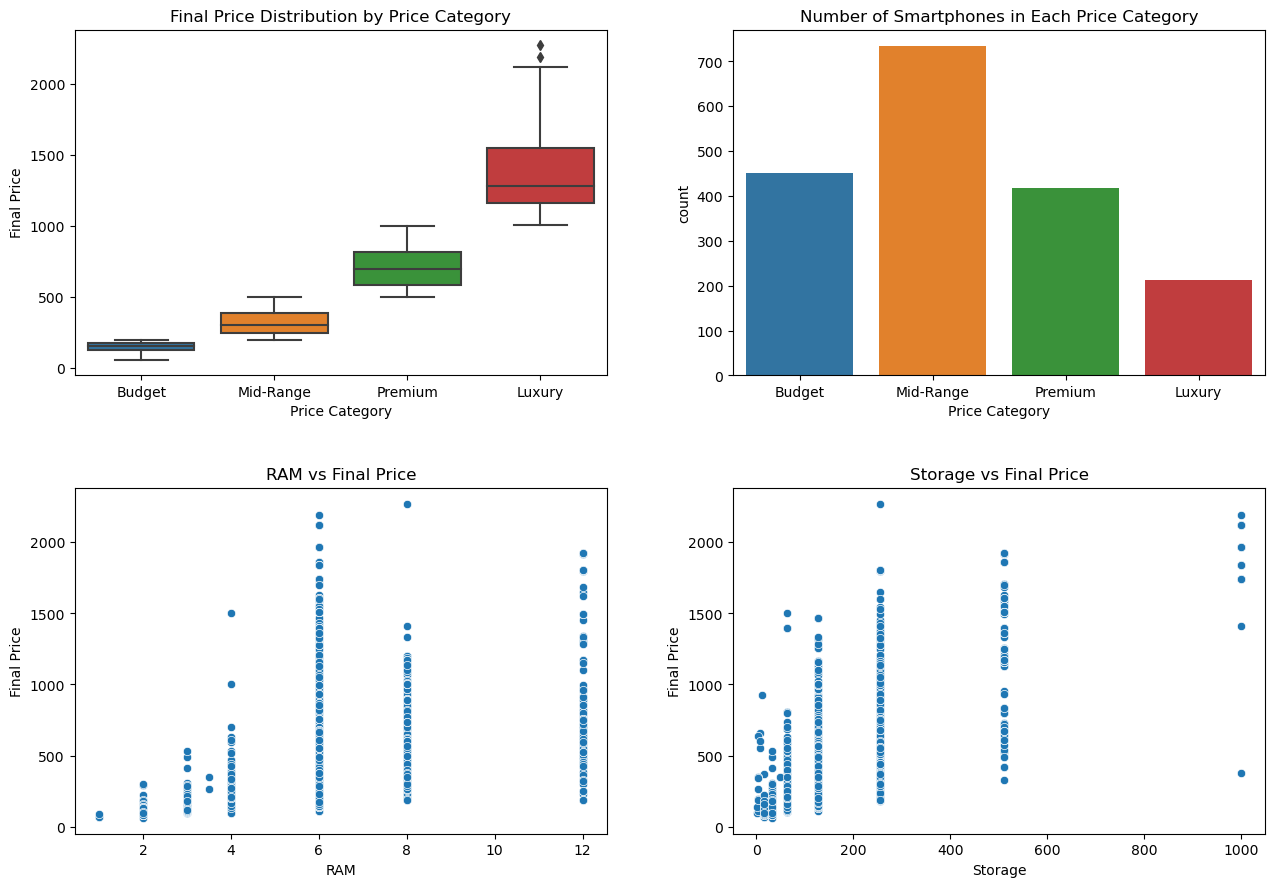

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
fig.tight_layout(pad=6.0)

sns.boxplot(ax=axes[0,0], x='Price Category', y='Final Price', data=smartphones)
axes[0,0].set_title('Final Price Distribution by Price Category')

sns.countplot(ax=axes[0,1], x='Price Category', data=smartphones)
axes[0,1].set_title('Number of Smartphones in Each Price Category')

sns.scatterplot(ax=axes[1,0], x='RAM', y='Final Price', data=smartphones)
axes[1,0].set_title('RAM vs Final Price')

sns.scatterplot(ax=axes[1,1], x='Storage', y='Final Price', data=smartphones)
axes[1,1].set_title('Storage vs Final Price')

### Insights & Recommendations

Here are my insights about these charts

``` Python
print('Hello World')
```

In [27]:
len(smartphones['Brand'].unique())

37

Text(0.5, 1.0, 'Price Distribution Across Different Brands')

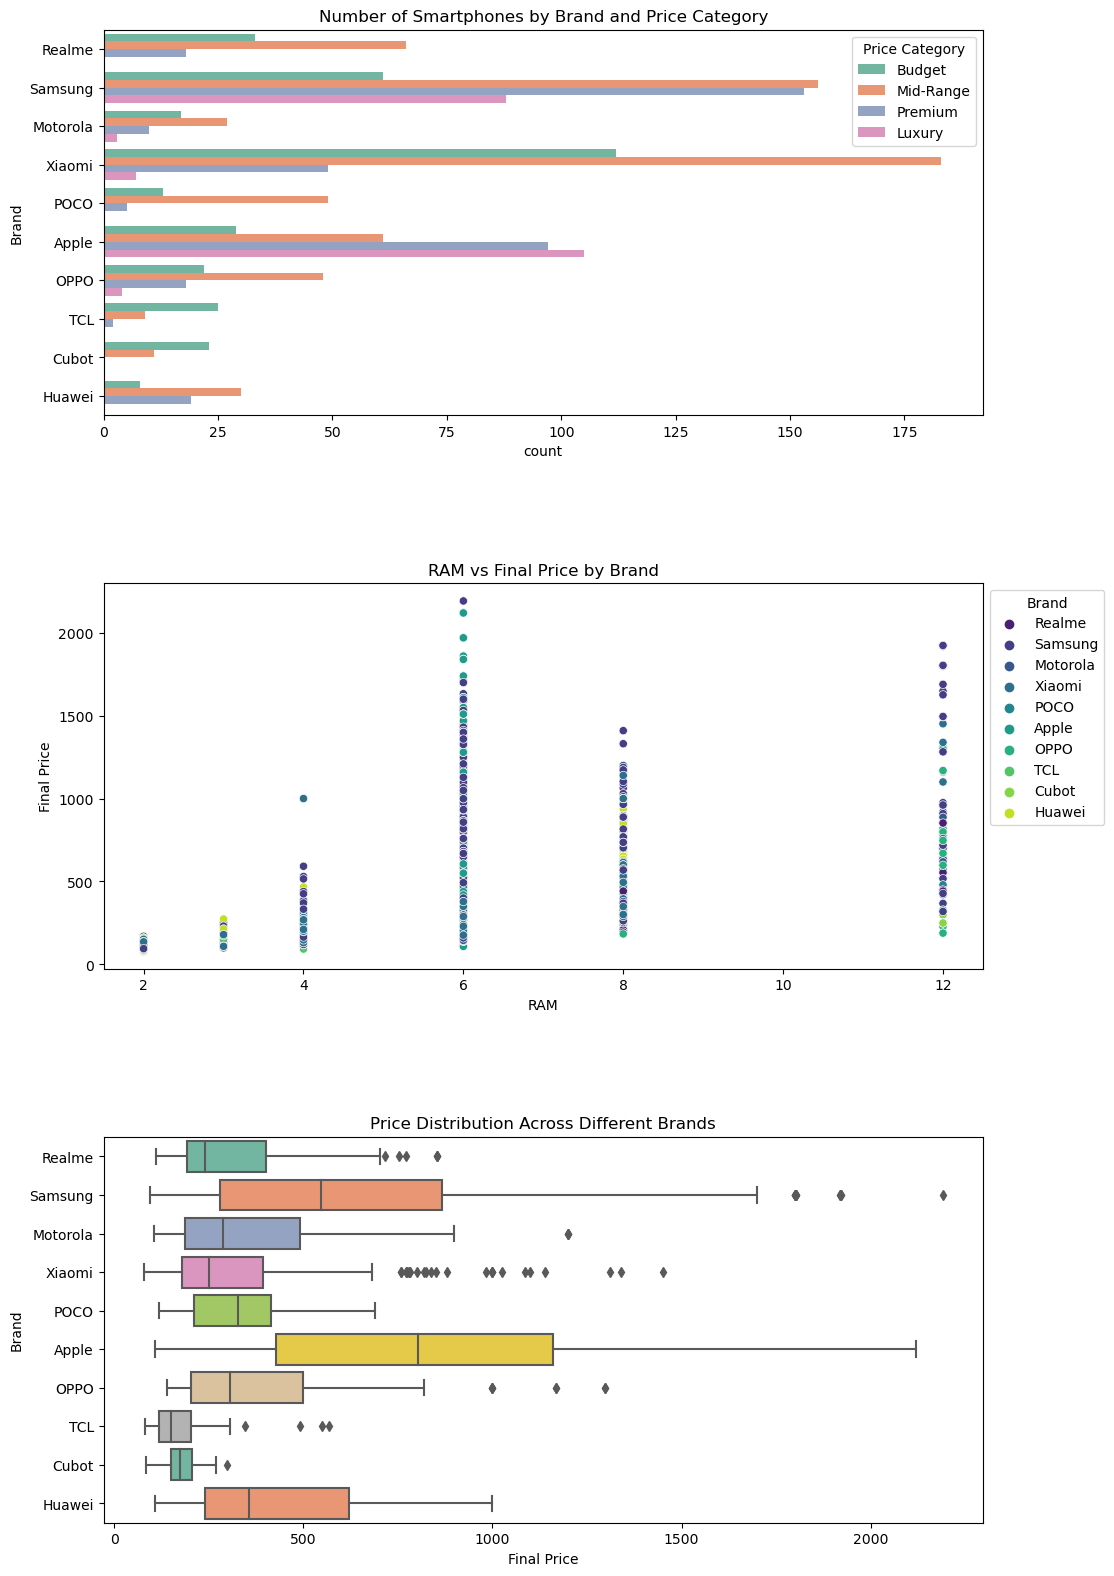

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,18))
fig.tight_layout(pad=10)

top_brands = smartphones['Brand'].value_counts().nlargest(10).index
filtered_data = smartphones[smartphones['Brand'].isin(top_brands)]

sns.countplot(ax=axes[0], y='Brand', hue='Price Category', data=filtered_data, palette='Set2')
axes[0].set_title('Number of Smartphones by Brand and Price Category')
axes[0].legend(title='Price Category')

sns.scatterplot(ax=axes[1], x='RAM', y='Final Price', hue='Brand', data=filtered_data, palette='viridis')
axes[1].set_title('RAM vs Final Price by Brand')
axes[1].legend(title='Brand', loc='upper left', bbox_to_anchor=(1,1))

sns.boxplot(ax=axes[2], x='Final Price', y='Brand', data=filtered_data, palette='Set2')
axes[2].set_title('Price Distribution Across Different Brands')